In [1]:
#!pip install simple_fpa

In [2]:
# %%capture out
# ! cd ..; pip install . --use-feature=in-tree-build

In [3]:
%%capture out
! cd ..; pip install .

In [4]:
print((out.stdout.split('\n')[-2]))

In [5]:
from simple_fpa import Model, load_haile
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
from pylab import rcParams

rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Arial"],
    "lines.linewidth": 1,
    "figure.dpi":200
})

In [6]:
data = load_haile()

In [7]:
model = Model(data = data, auctionid_columns = ['auctionid'], bid_column = 'actual_bid')
cont_covs = ['adv_value', 'hhi', 'volume_total_1']
disc_covs = ['year', 'forest']
model.residualize(cont_covs, disc_covs, 'multiplicative')

In [8]:
# we can pick a smaller subset of auctions
model.data = model.data[model.data.auctionid.isin(list(set(model.data.auctionid.values))[:400])].copy()
# we can pick certain numbers of bidders
model.data = model.data[model.data._bidders.isin([2,3,4,5])].copy()

In [9]:
model.summary()

                            OLS Regression Results                            
Dep. Variable:     np.log(actual_bid)   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                 1.495e+04
Date:                Mon, 23 May 2022   Prob (F-statistic):               0.00
Time:                        17:54:16   Log-Likelihood:                -37633.
No. Observations:               60758   AIC:                         7.536e+04
Df Residuals:                   60711   BIC:                         7.578e+04
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  2

In [10]:
# we can simulate artificial data, of course
# model.data._resid = np.sort(np.random.uniform(0,1,size = len(model.data)))

In [11]:
model.trim_residuals(10)
model.fit(smoothing_rate = 0.2, trim_percent = 15, reflect = True)
model.predict()

In [12]:
model.make_ci(99, hyp = 'twosided')
model.make_cb(99, draws = 1000, hyp = 'twosided')
model.make_cicb_for_ts(99, draws = 1000, hyp = 'twosided')

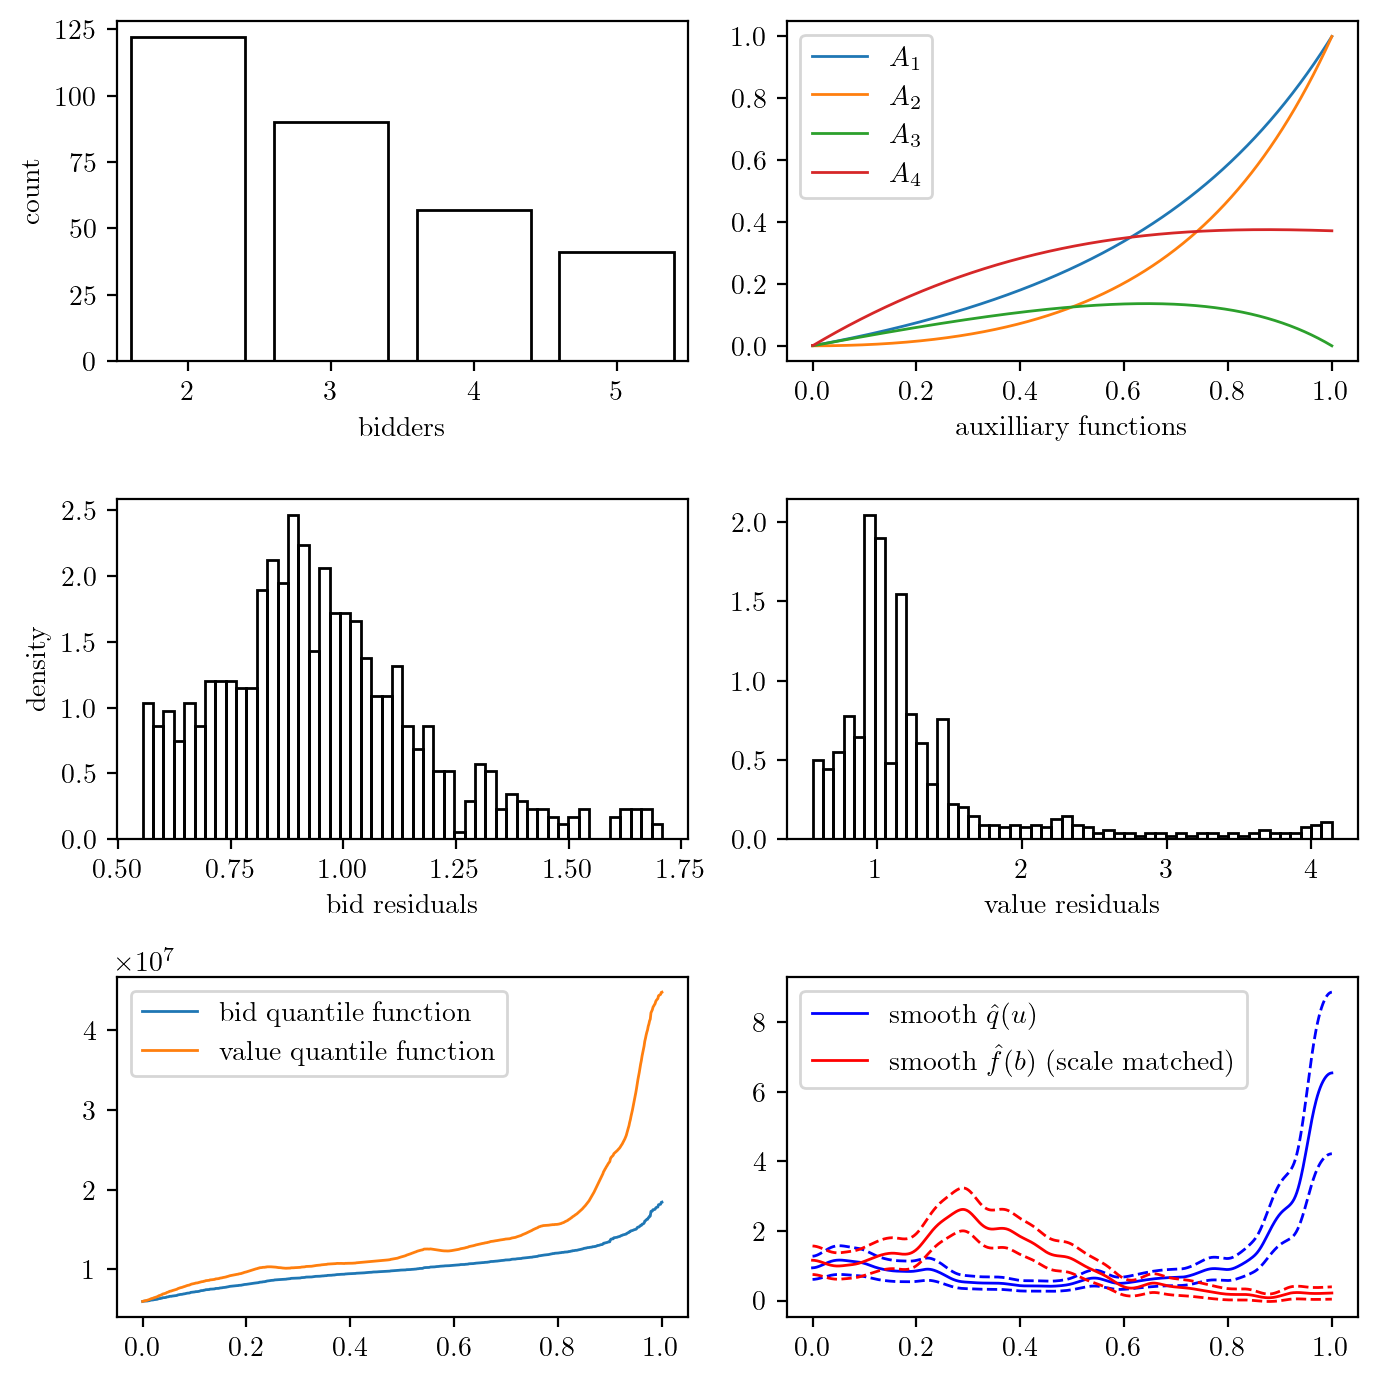

In [13]:
model.plot_stats()

optimal exclusion: 0.2328


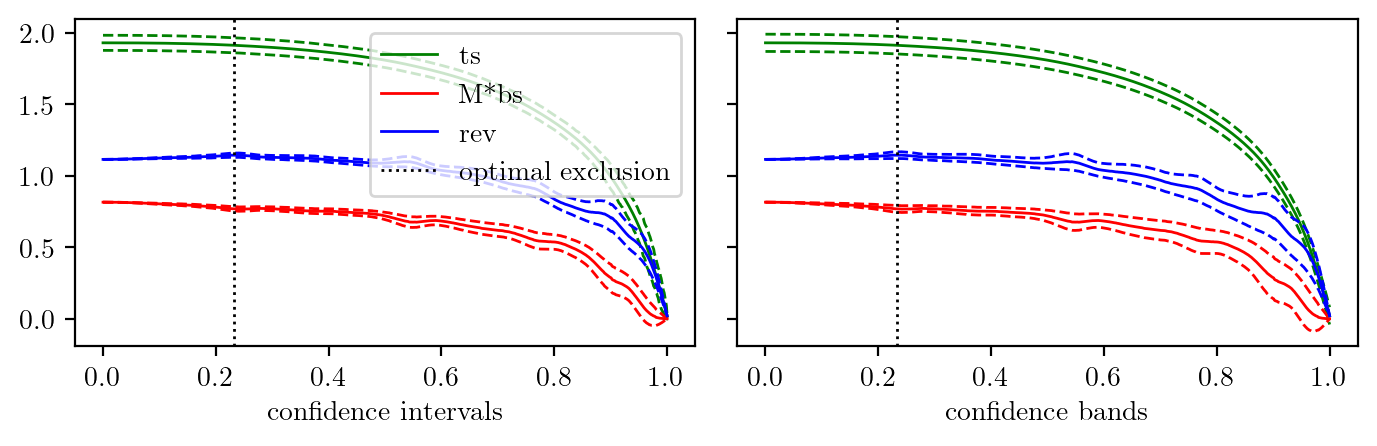

In [14]:
model.find_optimal_u()
model.plot_counterfactuals()

In [15]:
model.data.sample(5)

,auctionid,hhi,forest,adv_value,year,state,volume_total_1,actual_bid,_bidders,_resid,...,_q_ci,_v_ci,_bs_ci,_rev_ci,_q_cb,_v_cb,_bs_cb,_rev_cb,_ts_ci,_ts_cb
51495,277,0.328993,1,212725.0,82,1,26.0,220200.0,5,0.810306,...,0.223776,0.047746,0.001516,0.013647,0.350272,0.074736,0.002373,0.021361,0.052562,0.060372
161,161,0.530757,10,207060.0,82,6,102.0,460390.0,3,1.110320,...,0.318572,0.118970,0.005833,0.052500,0.498655,0.186221,0.009131,0.082177,0.051263,0.060372
16604,135,1.000000,6,3205257.0,82,6,309.0,3445350.0,5,0.783533,...,0.308502,0.059380,0.001674,0.015070,0.482892,0.092947,0.002621,0.023589,0.052317,0.060372
16527,58,0.525401,10,10889200.0,82,30,6840.0,13000840.0,3,0.574836,...,0.368386,0.007664,0.000021,0.000187,0.576627,0.011997,0.000032,0.000292,0.052894,0.060372
32986,64,0.523708,14,3474217.0,82,30,406.0,3689539.0,4,0.614520,...,0.412840,0.020926,0.000141,0.001267,0.646211,0.032755,0.000220,0.001983,0.052896,0.060372
